In [1]:
from aivolved.dataset import split_dataset

DATA_PATH = "data/soap/soap-80-20-20/"
split_dataset("data/soap/", DATA_PATH, label="defects")
split_dataset("data/soap/", DATA_PATH, label="non_defects")

100%|██████████| 168/168 [00:00<00:00, 2486.53it/s]


In [6]:
import torchvision

from aivolved.dataset import get_img_dataset_normalisation

train_dataset = torchvision.datasets.ImageFolder(
    DATA_PATH + "train",
    transform=torchvision.transforms.Compose([
        torchvision.transforms.Resize((224, 224)),
    ])
)

mean, stdev = get_img_dataset_normalisation(train_dataset)
mean, stdev

(array([0.24192693, 0.29593605, 0.39419054]),
 array([0.18127347, 0.18266465, 0.21710275]))

In [24]:
train_transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224, 224)),
    torchvision.transforms.AutoAugment(policy=torchvision.transforms.AutoAugmentPolicy.CIFAR10),
])

train_dataset = torchvision.datasets.ImageFolder(DATA_PATH + "train", transform=train_transforms)

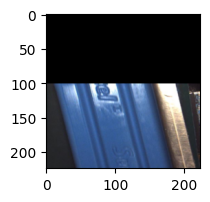

In [45]:
# sanity check

import matplotlib.pyplot as plt
plt.figure(figsize=(2, 2))
plt.imshow(train_dataset[0][0])